<a href="https://colab.research.google.com/github/SMunira38/RPDC_withVGG19_30ep/blob/main/vgg19_(for_30_70_custom)_30epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torchvision.models import vgg19
import matplotlib.pyplot as plt

In [ ]:
# Define paths for the dataset
data_dir = '/content/drive/MyDrive/Full Custom Data BRRI'
batch_size = 32

In [ ]:
# Define data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Load the entire dataset from Google Drive
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)


In [ ]:
# Calculate the sizes of train and test sets
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
print("Total Size:", train_size+test_size)
print("Train Size:", train_size)
print("Test Size:", test_size)

Total Size: 1600
Train Size: 1120
Test Size: 480


In [ ]:
# Split the dataset into train and test sets
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Create data loaders for train and test sets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
num_classes = len(dataset.classes)
print("Number of classes: ", num_classes)

Number of classes:  8


In [ ]:
# Load the pre-trained VGG19 model and modify it for your classification task

model = vgg19(pretrained=True)
model.classifier[6] = nn.Linear(4096, num_classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 191MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Training loop
num_epochs = 30
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions_train = 0
    total_samples_train = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_samples_train += labels.size(0)
        correct_predictions_train += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracy = correct_predictions_train / total_samples_train
    train_accuracies.append(train_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {train_losses[-1]} - Training Accuracy: {train_accuracy*100:.2f}%")

print("Finished Training")



Epoch [1/30] - Loss: 1.2042038747242518 - Training Accuracy: 58.30%
Epoch [2/30] - Loss: 0.5098119327000209 - Training Accuracy: 84.38%
Epoch [3/30] - Loss: 0.2859189919063023 - Training Accuracy: 91.07%
Epoch [4/30] - Loss: 0.18132287082927567 - Training Accuracy: 93.93%
Epoch [5/30] - Loss: 0.17588808249150004 - Training Accuracy: 94.46%
Epoch [6/30] - Loss: 0.14706669026719674 - Training Accuracy: 95.45%
Epoch [7/30] - Loss: 0.1077712198187198 - Training Accuracy: 96.34%
Epoch [8/30] - Loss: 0.05007322155205267 - Training Accuracy: 98.57%
Epoch [9/30] - Loss: 0.02145157460223085 - Training Accuracy: 99.20%
Epoch [10/30] - Loss: 0.057301152464268465 - Training Accuracy: 98.48%
Epoch [11/30] - Loss: 0.04180236474411296 - Training Accuracy: 98.84%
Epoch [12/30] - Loss: 0.01992581051973892 - Training Accuracy: 99.38%
Epoch [13/30] - Loss: 0.015968569825054145 - Training Accuracy: 99.46%
Epoch [14/30] - Loss: 0.019617335586891774 - Training Accuracy: 99.38%
Epoch [15/30] - Loss: 0.006145

In [20]:
# Testing loop
test_accuracies = []

model.eval()
correct_predictions_test = 0
total_samples_test = 0

class_correct = [0] * len(train_dataset.dataset.classes)  # Use train_dataset.dataset.classes
class_total = [0] * len(train_dataset.dataset.classes)    # Use train_dataset.dataset.classes

predicted_labels = []
actual_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total_samples_test += labels.size(0)
        correct_predictions_test += (predicted == labels).sum().item()

        # Store predicted and actual labels
        predicted_labels.extend(predicted.tolist())
        actual_labels.extend(labels.tolist())

        # Calculate correct predictions for each class
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += (predicted[i] == label).item()
            class_total[label] += 1

    test_accuracy = correct_predictions_test / total_samples_test
    test_accuracies.append(test_accuracy)
    print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

print(f"Total Correct Predictions on Test Set: {correct_predictions_test} out of {total_samples_test} samples")



Testing Accuracy: 93.75%
Total Correct Predictions on Test Set: 450 out of 480 samples


In [22]:
# Print correct predictions and actual labels for each class
for i, class_name in enumerate(train_dataset.dataset.classes):
    print(f"Accuracy for class {class_name}: {class_correct[i]}/{class_total[i]} ({class_correct[i]/class_total[i]*100:.2f}%)")


Accuracy for class Bacterial Blight: 86/92 (93.48%)
Accuracy for class Bakanae Pic: 15/16 (93.75%)
Accuracy for class False Smut: 9/13 (69.23%)
Accuracy for class Leaf blast: 96/98 (97.96%)
Accuracy for class Neck blast: 144/146 (98.63%)
Accuracy for class Node blast: 7/9 (77.78%)
Accuracy for class Sheath Blight: 9/16 (56.25%)
Accuracy for class Tungro: 84/90 (93.33%)


In [26]:
# Print predicted and actual labels for each sample
for i in range(len(predicted_labels)):
    print(f"Sample {i+1}: Predicted : {train_dataset.dataset.classes[predicted_labels[i]]},  Actual : {train_dataset.dataset.classes[actual_labels[i]]}")


Sample 1: Predicted : Neck blast,  Actual : Neck blast
Sample 2: Predicted : Tungro,  Actual : Tungro
Sample 3: Predicted : Bacterial Blight,  Actual : Tungro
Sample 4: Predicted : Bacterial Blight,  Actual : Bacterial Blight
Sample 5: Predicted : Node blast,  Actual : Node blast
Sample 6: Predicted : Leaf blast,  Actual : Leaf blast
Sample 7: Predicted : Neck blast,  Actual : Neck blast
Sample 8: Predicted : Neck blast,  Actual : Neck blast
Sample 9: Predicted : Bacterial Blight,  Actual : Bacterial Blight
Sample 10: Predicted : Tungro,  Actual : Tungro
Sample 11: Predicted : Bacterial Blight,  Actual : Bacterial Blight
Sample 12: Predicted : Bacterial Blight,  Actual : Bacterial Blight
Sample 13: Predicted : Tungro,  Actual : Tungro
Sample 14: Predicted : Node blast,  Actual : Node blast
Sample 15: Predicted : Tungro,  Actual : Tungro
Sample 16: Predicted : Leaf blast,  Actual : Leaf blast
Sample 17: Predicted : Neck blast,  Actual : Neck blast
Sample 18: Predicted : Neck blast,  Act

In [27]:
!pip install scikit-learn numpy


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
# Calculate precision, recall, and F1 score
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9362
Recall: 0.9375
F1 Score: 0.9358


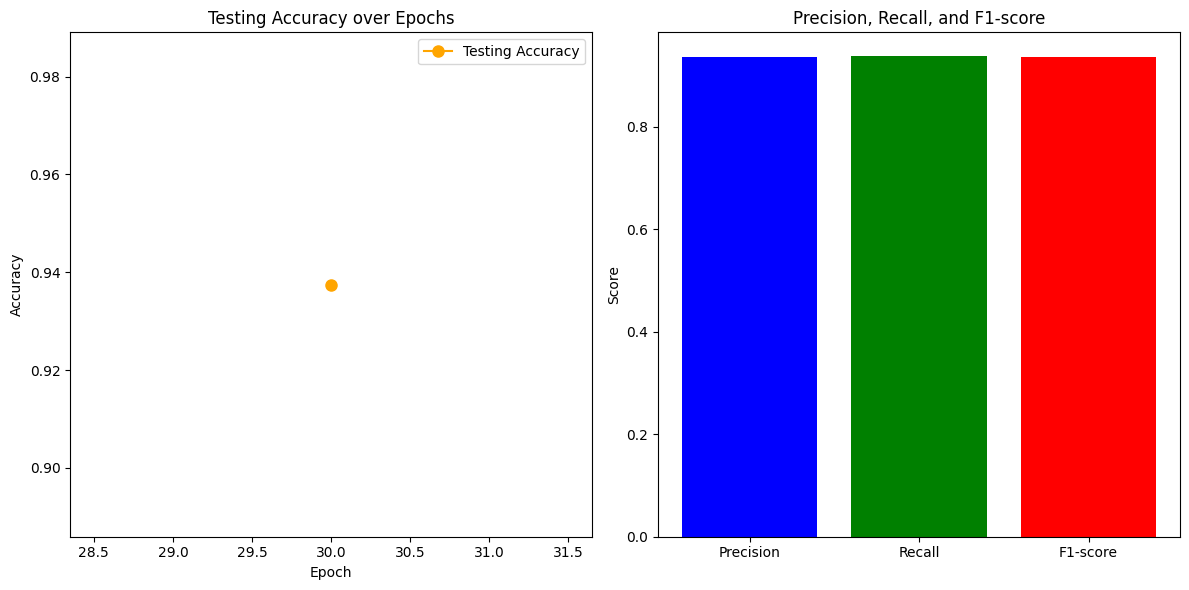

In [31]:
# Plot accuracy graphs
plt.figure(figsize=(12, 6))

# Plot Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot([num_epochs], test_accuracies, marker='o', markersize=8, color='orange', label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy over Epochs')
plt.legend()

# Plot Precision, Recall, and F1-score
metrics = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

plt.subplot(1, 2, 2)
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score')


plt.tight_layout()
plt.show()

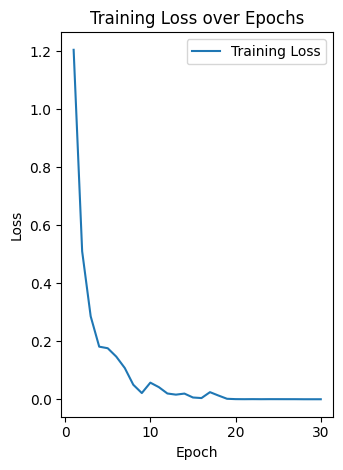

In [32]:
# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()